In [2]:
import os
import glob
import operator as op

import numpy as np
import matplotlib.pyplot as plt

from CCutils import  lmap
from CCutils import npmap
from CCio    import load_ccd_file
from CCplot  import auto_plot_style
from CCplot  import plot1d
from CCplot  import figure_sizes
from CCplot  import subplots

In [3]:
%matplotlib inline

auto_plot_style({"font.size":15})

In [4]:
def orderer(filename):
    basename = filename.split("/")[-1]
    tokens   = basename.split("_")
    index    = 0
    for token in tokens:
        if token[0].isdigit():
            index = 10000 * index + int(token)
    return index

# MgO

In [5]:
path      = "/home/gonzalo/data/CC/MgO_bleaching/"
filenames = sorted(glob.glob(os.path.join(path, "*signal*")), key=orderer)

datas     =  lmap(load_ccd_file, filenames)
em_wls    = npmap(op.attrgetter("em_wl"), datas)
spectra   = np.array([s.rate / s.power.mean for s in datas])

In [5]:
plot1d(em_wls.T, spectra.T);

In [6]:
dev  = spectra - spectra.mean(axis=0)
dev /= spectra.std(axis=0)

plt.figure(figsize=figure_sizes[2])
plt.subplot(*subplots[2], 1)
plot1d(em_wls.T, dev.T, ylabel="Dev from mean ($\sigma$)")

plt.subplot(*subplots[2], 2)
plt.hist(dev.flatten(), np.linspace(-5, 5, 101), histtype="step", density=1)
plt.xlabel("Dev from mean ($\sigma$)")
plt.ylabel("Fraction")

plt.tight_layout()

# ZnO

In [9]:
path      = "/home/gonzalo/data/CC/ZnO_bleaching/"
filenames = sorted(glob.glob(os.path.join(path, "*signal*")), key=orderer)

datas     = lmap(load_ccd_file, filenames)
em_wls    = npmap(op.attrgetter("em_wl"), datas)
spectra   = np.array([s.rate / s.power.mean for s in datas])

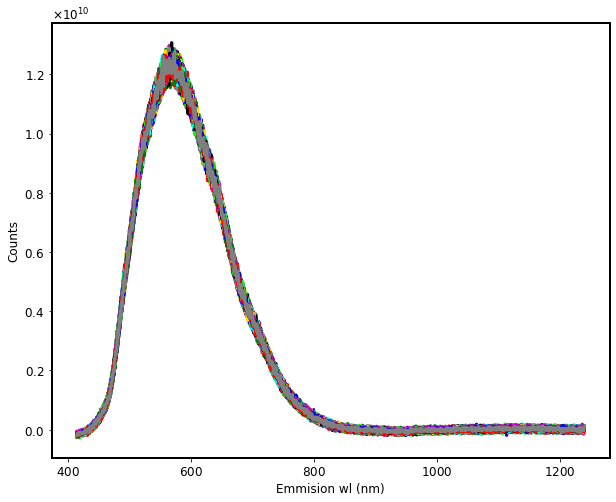

In [8]:
plot1d(em_wls.T, spectra.T);

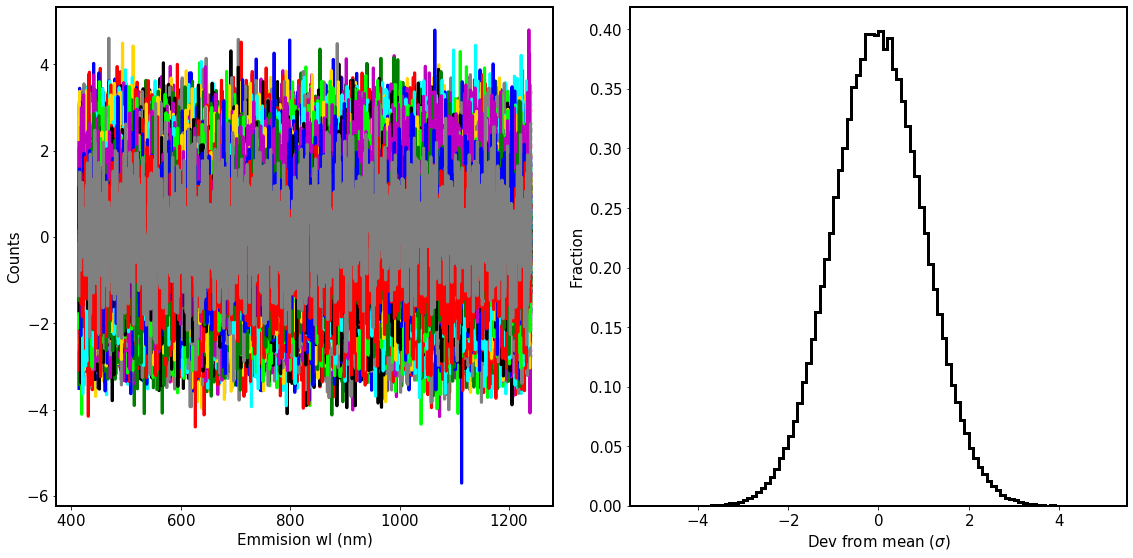

In [11]:
dev  = spectra - spectra.mean(axis=0)
dev /= spectra.std(axis=0)

plt.figure(figsize=figure_sizes[2])
plt.subplot(*subplots[2], 1)
plot1d(em_wls.T, dev.T, ylabel="Dev from mean ($\sigma$)")

plt.subplot(*subplots[2], 2)
plt.hist(dev.flatten(), np.linspace(-5, 5, 101), histtype="step", density=1)
plt.xlabel("Dev from mean ($\sigma$)")
plt.ylabel("Fraction")

plt.tight_layout()

In [13]:
em_wl = em_wls[0]
dq    = spectra[0]

In [29]:
from CCfit import *
from CCplot import plot_line

array([641.79153446, 572.15615854, 519.08942891])

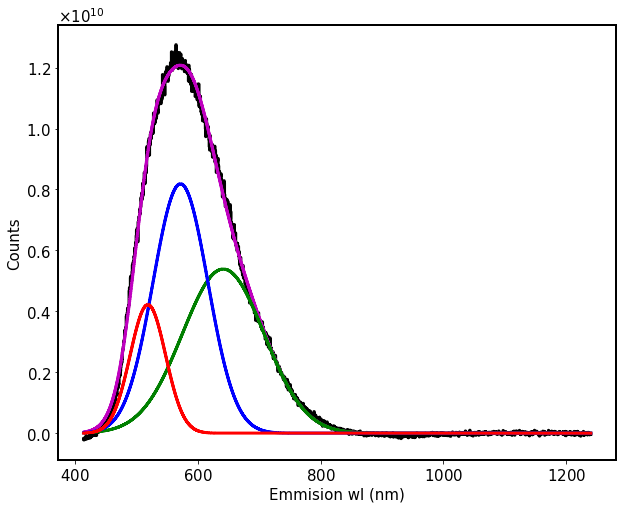

In [34]:
x, y = em_wl, dq
plot1d(x, y)

f = fit(triple_gauss, x, y, (1e10, 600, 30, 1e10, 600, 30, 1e10, 600, 30), fit_range=(400, 1000), maxfev=int(1e5))

plot1d(x, f.fn(x), "-")
plot1d(x, gauss(x, *f.values[0:3]))
plot1d(x, gauss(x, *f.values[3:6]))
plot1d(x, gauss(x, *f.values[6:9]))

f.values[1:9:3]

In [28]:
370*41500/22*6e-3

4187.727272727273

In [27]:
2.5e-5*12*20

0.006